In [ ]:
!nvidia-smi

Thu Feb 10 15:28:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('mylib.py','wb').write(src)
import mylib

Saving image.py to image.py


In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('mylib.py','wb').write(src)
import mylib

Saving utils.py to utils.py


In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('mylib.py','wb').write(src)
import mylib

Saving dataset.py to dataset.py


In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('mylib.py','wb').write(src)
import mylib

Saving model.py to model.py


In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('mylib.py','wb').write(src)
import mylib

Saving train.py to train.py


In [ ]:
import h5py     ### the HDF5 binary data format. Store huge amounts of numerical data, and easily manipulate that data from NumPy
                ###The Hierarchical Data Format version 5 (HDF5), is an open source file format that supports large, complex, heterogeneous data.
import scipy.io as io   ### solve scientific and mathematical problems
import PIL.Image as Image   ### pillow library for images
import numpy as np   ### for arrays
import os            ### operating system 
import glob          ### used to return all file paths that match a specific pattern
from matplotlib import pyplot as plt    ### for graphs and plots
from scipy.ndimage.filters import gaussian_filter   ###Gaussian Filter is a low pass filter used for reducing noise (high frequency components) and blurring regions of an image. ..
import scipy
import json    ### JavaScript Object Notation is used for the text of JSON is read as quoted-string which contains the value in key-value mapping within 
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch   ###
from scipy.ndimage import gaussian_filter
%matplotlib inline

In [ ]:
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(zip(np.nonzero(gt)[1], np.nonzero(gt)[0]))
    leafsize = 2048
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [ ]:
#set the root to the Shanghai dataset you download
root = '/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset'

In [ ]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    # k = gaussian_filter_density(k)
    k = gaussian_filter(k,1)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k
            # epochs indicates the number of passes of the entire training dataset the machine learning algorithm has completed

/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_100.jpg
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_107.jpg
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_102.jpg
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_109.jpg
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_101.jpg
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_108.jpg
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_1.jpg
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_104.jpg
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_10.jpg
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/im

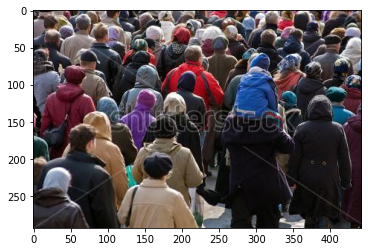

In [ ]:
#now see a sample from ShanghaiA
plt.imshow(Image.open(img_paths[110]))

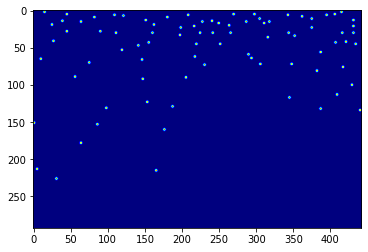

In [ ]:
gt_file = h5py.File(img_paths[110].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [ ]:
np.sum(groundtruth)                  #slight variation

85.0

In [ ]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train,part_B_test]

In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,5)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

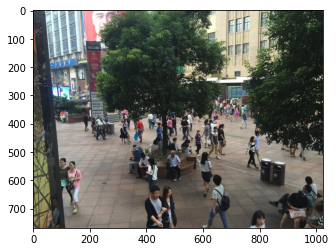

In [ ]:
plt.imshow(Image.open(img_paths[117]))

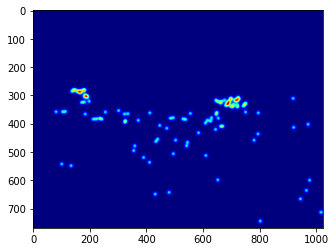

In [ ]:
gt_file = h5py.File(img_paths[117].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [ ]:
np.sum(groundtruth)

102.99999999999999

val.ipynb

In [ ]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F  ###They can be chained together using Compose . A Tensor Image is a tensor with (C, H, W) shape, where C is a number of channels, H and W are image height and width.
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [ ]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [ ]:
root = '/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset'

In [ ]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_test]

In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
model = CSRNet()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
model = model.cuda()

In [ ]:
checkpoint = torch.load('/content/drive/MyDrive/0model_best.pth.tar')

In [ ]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [ ]:
mae = 0
for i in range(len(img_paths)):
    img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    img[0,:,:]=img[0,:,:]-92.8207477031
    img[1,:,:]=img[1,:,:]-95.2757037428
    img[2,:,:]=img[2,:,:]-104.877445883
    img = img.cuda()
    #img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    print (i,mae)
print (mae/len(img_paths))

For single image

Predicted Count :  152


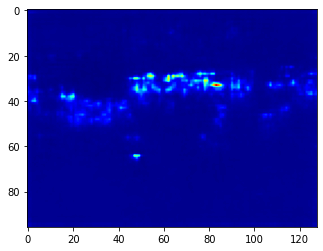

Original Count :  168


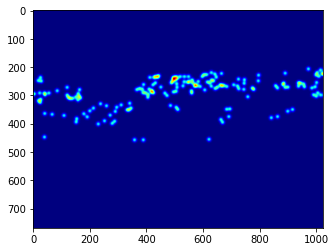

Original Image


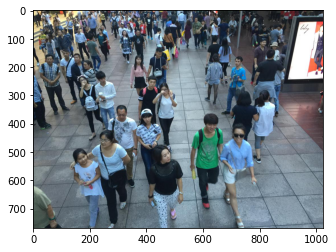

In [ ]:
from matplotlib import cm as c

img = transform(Image.open('/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_155.jpg').convert('RGB')).cuda()
output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()

temp = h5py.File('/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/ground_truth/IMG_155.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")

plt.imshow(plt.imread('/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_150.jpg'))
plt.show()